## Unsupervised Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

### Data Directory

In [2]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [6]:
input_file = INPUT_DIR + 'train_FD003.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [7]:
df.head()

unit  time_cycles  setting1  setting2  setting3  meas01  meas02   meas03  \
0     1            1   -0.0005    0.0004     100.0  518.67  642.36  1583.23   
1     1            2    0.0008   -0.0003     100.0  518.67  642.50  1584.69   
2     1            3   -0.0014   -0.0002     100.0  518.67  642.18  1582.35   
3     1            4   -0.0020    0.0001     100.0  518.67  642.92  1585.61   
4     1            5    0.0016    0.0000     100.0  518.67  641.68  1588.63   

    meas04  meas05   ...    meas17  meas18  meas19  meas20   meas21  meas22  \
0  1396.84   14.62   ...       391    2388   100.0   39.11  23.3537     NaN   
1  1396.89   14.62   ...       392    2388   100.0   38.99  23.4491     NaN   
2  1405.61   14.62   ...       391    2388   100.0   38.85  23.3669     NaN   
3  1392.27   14.62   ...       392    2388   100.0   38.96  23.2951     NaN   
4  1397.65   14.62   ...       392    2388   100.0   39.14  23.4583     NaN   

   meas23  meas24  meas25  meas26  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 31 columns]

### Features to use

In [8]:
id_cols = ['unit', 'time_cycles']
feature_set = ['setting1', 'setting2', 
              'meas02', 'meas03', 'meas04', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas17', 'meas20', 
              'meas21']

In [9]:
cols = feature_set + id_cols

In [10]:
print(cols)

['setting1', 'setting2', 'meas02', 'meas03', 'meas04', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas17', 'meas20', 'meas21', 'unit', 'time_cycles']


In [11]:
df = df[cols]

In [12]:
df.head()

setting1  setting2  meas02   meas03   meas04  meas06  meas07   meas08  \
0   -0.0005    0.0004  642.36  1583.23  1396.84   21.61  553.97  2387.96   
1    0.0008   -0.0003  642.50  1584.69  1396.89   21.61  554.55  2388.00   
2   -0.0014   -0.0002  642.18  1582.35  1405.61   21.61  554.43  2388.03   
3   -0.0020    0.0001  642.92  1585.61  1392.27   21.61  555.21  2388.00   
4    0.0016    0.0000  641.68  1588.63  1397.65   21.61  554.74  2388.04   

    meas09  meas10  meas11  meas12   meas13   meas14  meas15  meas17  meas20  \
0  9062.17     1.3   47.30  522.31  2388.01  8145.32  8.4246     391   39.11   
1  9061.78     1.3   47.23  522.42  2388.03  8152.85  8.4403     392   38.99   
2  9070.23     1.3   47.22  522.03  2388.00  8150.17  8.3901     391   38.85   
3  9064.57     1.3   47.24  522.49  2388.08  8146.56  8.3878     392   38.96   
4  9076.14     1.3   47.15  522.58  2388.03  8147.80  8.3869     392   39.14   

    meas21  unit  time_cycles  
0  23.3537     1            1  
1  23.4491     1            2  
2  23.3669     1            3  
3  23.2951     1            4  
4  23.4583     1            5

### Standardizing the dataset

In [13]:
# Preprocessing the dataset

X = df[feature_set]

normalized_X = preprocessing.normalize(X)

In [14]:
normalized_X

array([[-3.88682249e-08,  3.10945799e-08,  4.99347859e-02, ...,
         3.03949519e-02,  3.04027255e-03,  1.81543373e-03],
       [ 6.21661699e-08, -2.33123137e-08,  4.99272052e-02, ...,
         3.04614232e-02,  3.02982370e-03,  1.82217592e-03],
       [-1.08749828e-07, -1.55356897e-08,  4.98835462e-02, ...,
         3.03722734e-02,  3.01780773e-03,  1.81510454e-03],
       ...,
       [-1.24363773e-07,  3.10909432e-08,  5.00439822e-02, ...,
         3.07800338e-02,  2.98395327e-03,  1.79303024e-03],
       [-1.78758321e-07,  3.10884036e-08,  5.00476666e-02, ...,
         3.06997986e-02,  2.97749186e-03,  1.79343560e-03],
       [ 0.00000000e+00,  2.33134450e-08,  5.00182191e-02, ...,
         3.07737474e-02,  2.99655479e-03,  1.79394628e-03]])

In [15]:
from collections import Counter
from sklearn.cluster import DBSCAN


def dbscan_gridsearch(X, eps_list, min_pts_list):
    
    print('Instances = ', len(X))
    print('| Eps | \tmpts | \tClus | \tAnom | \tTime |')
    print('| -- | -- | -- | -- | -- |')
    
    for eps in eps_list:
        for min_samples in min_pts_list:

            tic = time.time()
            clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            toc = time.time()
            total_time = toc-tic

            labels = clustering.labels_
            unq_labels = np.unique(labels)

            counter = Counter(labels)

            outliers_count = 0
            # The percentages in frequency_dict wont add upto 100 since only
            # values more than 1 are added to the new dictionary - look at the 
            # if statement below
            frequency_dict = {}
            for k in counter:
                v = counter[k]
                frequency_dict[k] = v

                if k == -1:
                    outliers_count = v

            print('|' + str(eps) + '|\t' + str(min_samples) + '|\t' + str(len(unq_labels)-1) + '|\t' + str(outliers_count) + '|\t' + str(total_time) + '|')

        # print('------------------------------------')
    # print('------------------------------------')

In [16]:
# eps_list = [0.55, 0.60, 0.7, 0.8, 0.9, 0.95]
eps_list = [0.00025, 0.0005, 0.0010, 0.0015, 0.0020]
min_pts_list = [100, 500, 1000, 2000, 3000]
dbscan_gridsearch(X=normalized_X, eps_list=eps_list, min_pts_list=min_pts_list)

Instances =  24720
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.00025|	100|	1|	12156|	2.5564768314361572|
|0.00025|	500|	0|	24720|	2.6614739894866943|
|0.00025|	1000|	0|	24720|	2.7408697605133057|
|0.00025|	2000|	0|	24720|	2.670820713043213|
|0.00025|	3000|	0|	24720|	2.6360981464385986|
|0.0005|	100|	1|	570|	8.486155033111572|
|0.0005|	500|	1|	2506|	8.956024169921875|
|0.0005|	1000|	1|	4609|	8.679023027420044|
|0.0005|	2000|	1|	7858|	9.10183596611023|
|0.0005|	3000|	1|	10748|	8.954246044158936|
|0.001|	100|	1|	18|	22.991990089416504|
|0.001|	500|	1|	140|	23.440378189086914|
|0.001|	1000|	1|	235|	23.551895141601562|
|0.001|	2000|	1|	369|	23.73517084121704|
|0.001|	3000|	1|	718|	21.903465032577515|
|0.0015|	100|	0|	0|	24.971452713012695|
|0.0015|	500|	1|	21|	21.670546770095825|
|0.0015|	1000|	1|	45|	19.870882034301758|
|0.0015|	2000|	1|	59|	19.978153944015503|
|0.0015|	3000|	1|	64|	19.683094024658203|
|0.002|	100|	0|	0|	16.895331859588623|
|0.002|	500|	0|	0|	16.5

In [17]:
# eps_list = [0.55, 0.60, 0.7, 0.8, 0.9, 0.95]
eps_list = [0.0010]
min_pts_list = [3000, 3500, 4000, 4500, 5000]
dbscan_gridsearch(X=normalized_X, eps_list=eps_list, min_pts_list=min_pts_list)

Instances =  24720
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.001|	3000|	1|	718|	17.324931144714355|
|0.001|	3500|	1|	890|	17.203436851501465|
|0.001|	4000|	1|	1030|	18.374009132385254|
|0.001|	4500|	1|	1196|	19.54177689552307|
|0.001|	5000|	1|	1340|	19.890227794647217|


## Using specific hyperparameters

In [18]:
mpts = 4000
eps = 0.001

X = df[feature_set]
X = normalized_X.copy()
clustering = DBSCAN(eps=eps, min_samples=mpts).fit(X)
labels = clustering.labels_

In [19]:
# Get the basic statistics for the clustering results 
# -1 cluster is a set of outliers

unq_labels = np.unique(labels)
counter = Counter(labels)
counter

Counter({0: 23690, -1: 1030})

In [20]:
df['labels'] = labels

## Write down the results into csv

In [21]:
op_file = OUTPUT_DIR + 'fd003_dbscan_results_' + str(mpts) + '_' + str(eps) + '.csv'
with open(op_file, 'wb') as f:
    df.to_csv(op_file, header=True, index=False, sep=',')

print('Writing to ', op_file)

Writing to  ../data/interim/fd003_dbscan_results_4000_0.001.csv


In [22]:
df.head()

setting1  setting2  meas02   meas03   meas04  meas06  meas07   meas08  \
0   -0.0005    0.0004  642.36  1583.23  1396.84   21.61  553.97  2387.96   
1    0.0008   -0.0003  642.50  1584.69  1396.89   21.61  554.55  2388.00   
2   -0.0014   -0.0002  642.18  1582.35  1405.61   21.61  554.43  2388.03   
3   -0.0020    0.0001  642.92  1585.61  1392.27   21.61  555.21  2388.00   
4    0.0016    0.0000  641.68  1588.63  1397.65   21.61  554.74  2388.04   

    meas09  meas10   ...    meas12   meas13   meas14  meas15  meas17  meas20  \
0  9062.17     1.3   ...    522.31  2388.01  8145.32  8.4246     391   39.11   
1  9061.78     1.3   ...    522.42  2388.03  8152.85  8.4403     392   38.99   
2  9070.23     1.3   ...    522.03  2388.00  8150.17  8.3901     391   38.85   
3  9064.57     1.3   ...    522.49  2388.08  8146.56  8.3878     392   38.96   
4  9076.14     1.3   ...    522.58  2388.03  8147.80  8.3869     392   39.14   

    meas21  unit  time_cycles  labels  
0  23.3537     1            1       0  
1  23.4491     1            2       0  
2  23.3669     1            3       0  
3  23.2951     1            4       0  
4  23.4583     1            5       0  

[5 rows x 21 columns]

## Plot the graph for each feature

In [23]:
import math

def plot_graphs_label(df, feature, units_per_graph):
        
    colors = ['b', 'r', 'c', 'm', 'g', 'k', 'y']
    xlabel = 'Time'
    ylabel = 'Value'

    unit_start = 0
    time_col = 'time_cycles'

    total_plots = math.ceil(100 / units_per_graph)
    cols_plot = 2
    rows_plot = math.ceil(total_plots/cols_plot)
    
    print('Rows', rows_plot, 'Total', total_plots)

    plt.rcParams['figure.figsize'] = [cols_plot * 10, rows_plot * 7] # Size of the plots        
    plt.figure()
    
    unq_labels = np.unique(df['labels'])
    unq_labels.sort()
   
    idx = 1

    for i in range(total_plots):

        start_unit = (i) * units_per_graph + 1
        end_unit = start_unit + units_per_graph - 1

        plt.subplot(rows_plot, cols_plot, i+1)
        plt.ylabel(feature)
        plt.xlabel(time_col)
        plt.xticks(rotation=45)
        plt.title('Units ' + str(start_unit) + '-' + str(end_unit))

        for current_unit in range(start_unit, end_unit+1, 1):
            
            color = colors[current_unit%len(colors)]
            
            df_sub = df.loc[df['unit'] == current_unit]
            df_sub = df_sub[[time_col, feature]]            
            
            x = df_sub['time_cycles']
            y = df_sub[feature]

            plt.plot(x, y, c=color, linewidth=1)
            
            # Only scatter plot the outliers              
            df_cluster = df_sub.loc[df['labels'] == -1]
            x = np.array(df_cluster[time_col])
            y = np.array(df_cluster[feature])
            
            size = 20
            alpha = 1
            plt.scatter(x, y, c=color, alpha=alpha, s=size, label='Outliers')

    plt.show()

Rows 50 Total 100


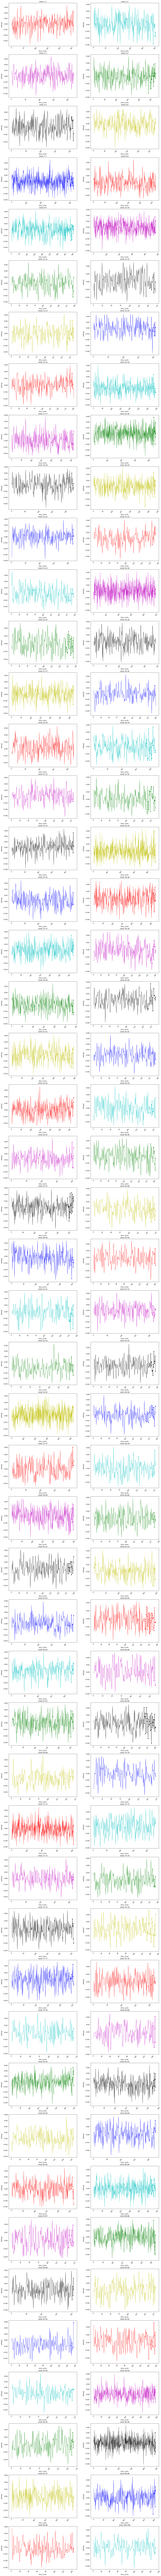

In [24]:
feature = 'setting1'
plot_graphs_label(df=df, feature=feature, units_per_graph=1)